In [4]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')

In [30]:
# Import data into Pandas as a data frame
df = pd.read_csv('./WBCD.csv')
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [31]:
# Transform DIAGNOSIS column to a numeric variable
df["diagnosis2"] = (df.diagnosis == "M").astype(int)
# drop the diagnosis variable expressed as 'M or 'B'
df = df.drop("diagnosis", axis="columns")
# Also, drop the ID variable as it should not be used for prediction
df = df.drop("id",axis="columns")
df.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis2
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [35]:
# predictor_cols = df.loc[:, df.columns != "diagnosis2"]
predictor_cols = df[["radius_mean", "texture_mean", "perimeter_mean"]]
target_col = df["diagnosis2"]
predictor_cols[:5]

,radius_mean,texture_mean,perimeter_mean
0,17.99,10.38,122.80
1,20.57,17.77,132.90
2,19.69,21.25,130.00
3,11.42,20.38,77.58
4,20.29,14.34,135.10


In [37]:
from sklearn import linear_model
lin_model = linear_model.LogisticRegression(max_iter = 1000)


# Fit the Logistic regression model now
lin_model.fit(predictor_cols, target_col)

LogisticRegression(max_iter=1000)

In [38]:
from sklearn import metrics

print ("Accuracy = %.3f" % (metrics.accuracy_score(lin_model.predict(predictor_cols), df.diagnosis2)))

Accuracy = 0.909


In [39]:
print(lin_model)

LogisticRegression(max_iter=1000)


In [43]:
# col_list = list(df.columns.values.tolist())
print("Number of columns in data frame = ", len(df.columns))
count = 0
for col in predictor_cols:
    print(col,"  ", lin_model.coef_[0,count],"\n")
    count = count + 1
    
print("FINALLY printing the Intercept for Logistic Regression = ", lin_model.intercept_)

Number of columns in data frame =  31
radius_mean    -3.295479904249605 

texture_mean    0.22087803983395313 

perimeter_mean    0.6504310505325966 

FINALLY printing the Intercept for Logistic Regression =  [-18.17021723]


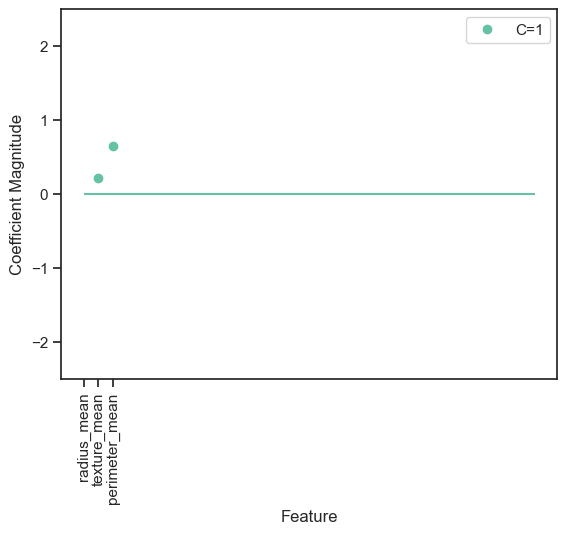

In [47]:
plt.plot(lin_model.coef_.T,'o',label = "C=1")
plt.xticks(range(predictor_cols.shape[1]),predictor_cols, rotation = 90)
plt.hlines(0,0,df.shape[1])
plt.ylim(-2.5,2.5)
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.legend()

In [51]:
X_new1=[[17.99, 10.38, 122.80]]
def Predict_for_new_patient(X_new):
    pred_val = lin_model.predict(X_new)
    print("Prediction for new value = ", pred_val)
    if(pred_val == 1):
        pred_valstr = "Malignant"
    elif(pred_val == 0):
        pred_valstr = "Benign"
        
    return(pred_valstr)
    
print("Predicted value for New Patient = " , Predict_for_new_patient(X_new1))

Prediction for new value =  [1]
Predicted value for New Patient =  Malignant


C:\Users\Victoria\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [52]:
X_new2 = [[13.54, 14.36, 87.46]]
print("Prediction for new value = ", Predict_for_new_patient(X_new2))

Prediction for new value =  [0]
Prediction for new value =  Benign


C:\Users\Victoria\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [53]:
print("Predicted probability of class 1 (diagnosis2 = 1) = ", lin_model.predict_proba(X_new1)[:,1])

Predicted probability of class 1 (diagnosis2 = 1) =  [0.99107334]


C:\Users\Victoria\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [55]:
print("Predicted probability of class 0 (or diagnosis2 = 0) = ", (1-lin_model.predict_proba(X_new2)[:,1]))

Predicted probability of class 0 (or diagnosis2 = 0) =  [0.93891776]


C:\Users\Victoria\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [57]:
# Finally print the ODDS ratios for each of the independent variables
# The ODDS ratio os the increase in likelihood for a ONE unit increase in the independent variable
# The odds ratio is simply the exponent of the fitted coefficient
# col_list = list(df.columns.values.tolist())
print("Number of columns in data frame = ", len(df.columns))
count = 0
for col in predictor_cols:
    # Do nothing if you have reached the last column since it contains the diagnosis (the Y variable)
    if(col == "diagnosis2"):
        break
    print("ODDS Ratio for variable ", col,"=  ", np.exp(lin_model.coef_[0,count]),"\n")
    count = count + 1
    

Number of columns in data frame =  31
ODDS Ratio for variable  radius_mean =   0.037050260202709365 

ODDS Ratio for variable  texture_mean =   1.2471713160675022 

ODDS Ratio for variable  perimeter_mean =   1.9163667018921375 

